# Education


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import panel as pn
import matplotlib.ticker as mticker

## Education Scheme

In [33]:
df=pd.read_csv("Education_Schemes.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Scheme_Name               150 non-null    object 
 1   State.1                   150 non-null    object 
 2   Year.1                    150 non-null    float64
 3   No_of_Students_Benefited  150 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.8+ KB


In [37]:
df.isnull().sum()

Scheme_Name                 0
State.1                     0
Year.1                      0
No_of_Students_Benefited    0
dtype: int64

In [39]:



df = pd.read_csv("Education_Schemes.csv")  


df_bicycle = df[df["Scheme_Name"].str.contains("Free Bicycle", case=False, na=False)]


total_students = df_bicycle["No_of_Students_Benefited"].sum()

print(f"Total students benefited by Free Bicycle Scheme: {total_students}")


Total students benefited by Free Bicycle Scheme: 3388705.0


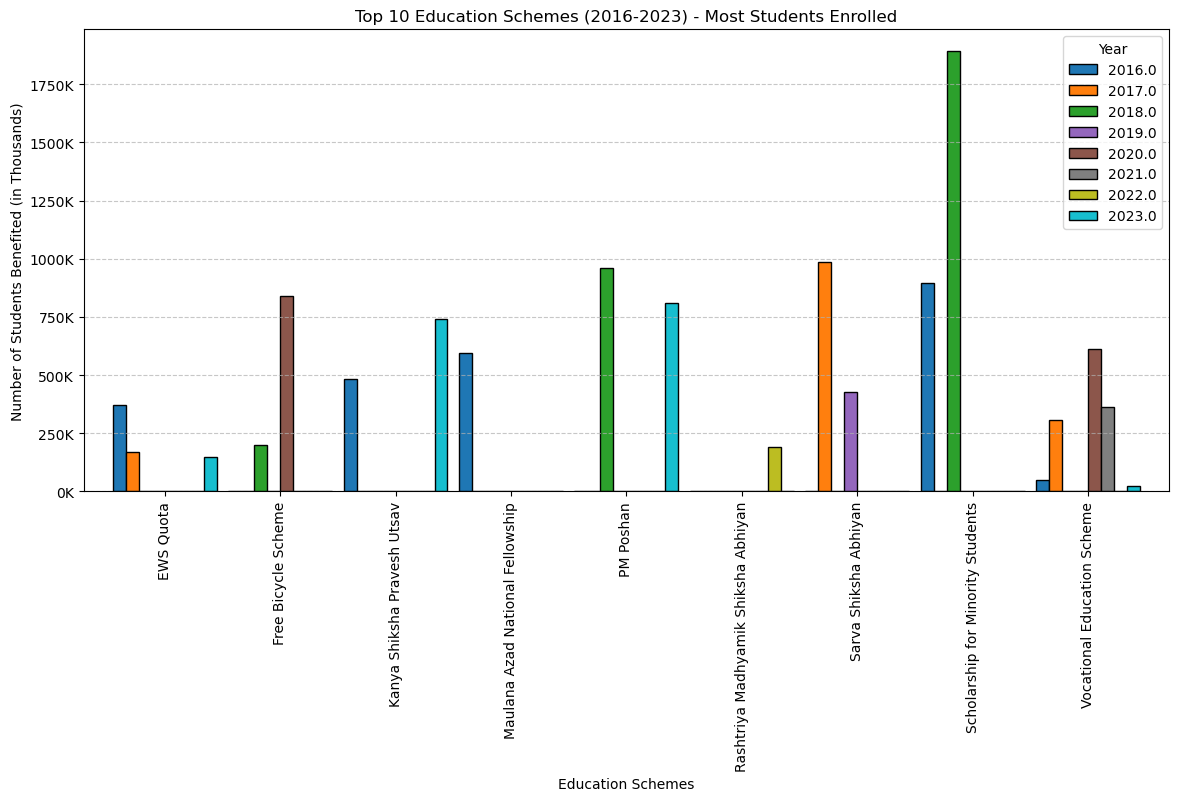

In [41]:

df = pd.read_csv("Education_Schemes.csv")  

top_10_schemes = df.groupby("Scheme_Name")["No_of_Students_Benefited"].sum().nlargest(10).index

df_filtered = df[(df["Scheme_Name"].isin(top_10_schemes)) & 
                 (df["Year.1"].between(2016, 2023))]

df_pivot_top_10 = df_filtered.pivot_table(index="Scheme_Name", columns="Year.1", values="No_of_Students_Benefited", aggfunc="sum")

fig, ax = plt.subplots(figsize=(14, 6))
df_pivot_top_10.plot(kind="bar", ax=ax, colormap="tab10", width=0.9, edgecolor="black")

# Format Y-axis to show values in 'thousands'
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

ax.yaxis.grid(True, linestyle="--", alpha=0.7)


plt.xlabel("Education Schemes")
plt.ylabel("Number of Students Benefited (in Thousands)")
plt.title("Top 10 Education Schemes (2016-2023) - Most Students Enrolled")
plt.xticks(rotation=90) 
plt.legend(title="Year")

plt.show()


In [42]:
df.columns

Index(['Scheme_Name', 'State.1', 'Year.1', 'No_of_Students_Benefited'], dtype='object')

Matplotlib(Figure)


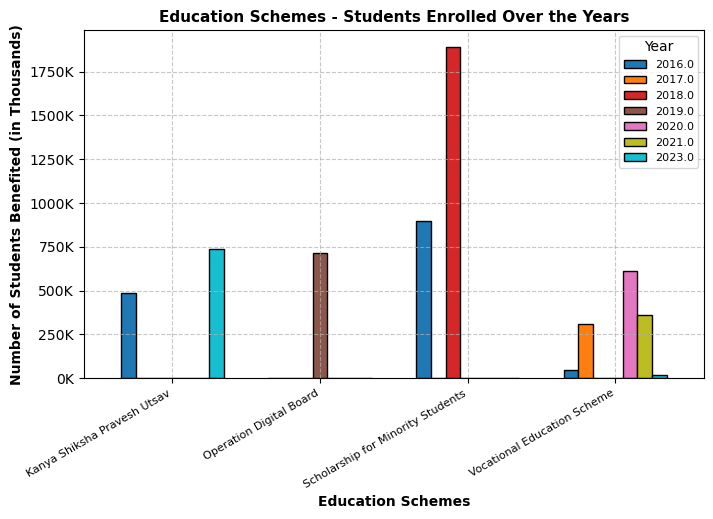

In [43]:

df_edu = pd.read_csv("Education_Schemes.csv")


unique_schemes = df_edu["Scheme_Name"].dropna().unique().tolist()
years = sorted([year for year in df_edu["Year.1"].dropna().astype(int).unique() if 2013 <= year <= 2023])


scheme_selector = pn.widgets.CheckBoxGroup(name="Select Schemes", options=unique_schemes[:10], value=unique_schemes[:5])
year_selector = pn.widgets.CheckBoxGroup(name="Select Years", options=years, value=years[-8:])  

def plot_chart(selected_schemes, selected_years):
    df_filtered = df_edu[(df_edu["Scheme_Name"].isin(selected_schemes)) & 
                          (df_edu["Year.1"].isin(selected_years))]


    df_pivot = df_filtered.pivot_table(index="Scheme_Name", columns="Year.1", values="No_of_Students_Benefited", aggfunc="sum")


    if df_pivot.empty:
        return plt.figure(figsize=(8, 6))


    fig, ax = plt.subplots(figsize=(8, 6)) 
    df_pivot.plot(kind="bar", ax=ax, colormap="tab10", width=0.7, edgecolor="black")

    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.xlabel("Education Schemes", fontsize=10, fontweight="bold")
    plt.ylabel("Number of Students Benefited (in Thousands)", fontsize=10, fontweight="bold")
    plt.title("Education Schemes - Students Enrolled Over the Years", fontsize=11, fontweight="bold")

    plt.xticks(rotation=30, fontsize=8, ha="right") 
    plt.subplots_adjust(bottom=0.3)  

    plt.legend(title="Year", fontsize=8)
    plt.grid(True, linestyle="--", alpha=0.7)

    return fig 

print(pn.pane.Matplotlib(pn.bind(plot_chart, scheme_selector, year_selector)))

In [44]:
df=pd.read_csv("State_GDP_Education.csv")

In [47]:
df.head()

,State,Year,GDP_Education_Percentage
0,Gujarat,2005,5.30
1,Chhattisgarh,2016,6.08
2,Gujarat,2016,6.08
3,Jharkhand,2014,7.68
4,Gujarat,2018,6.90


In [48]:
df.isnull().sum()

State                       0
Year                        0
GDP_Education_Percentage    0
dtype: int64

In [49]:
df.columns

Index(['State', 'Year', 'GDP_Education_Percentage'], dtype='object')

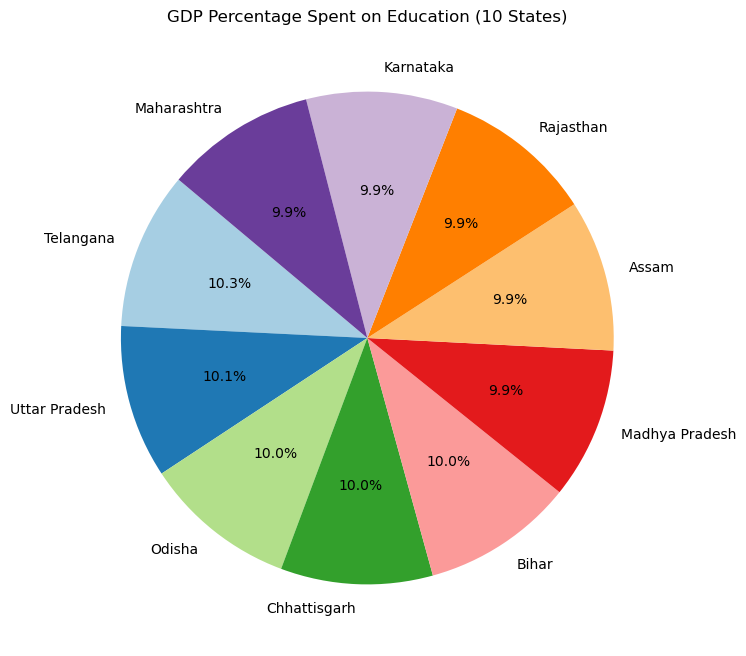

In [50]:

  
df = pd.read_csv("State_GDP_Education.csv")

df_grouped = df.groupby("State")["GDP_Education_Percentage"].mean().reset_index()


df_top10 = df_grouped.nlargest(10, "GDP_Education_Percentage")

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df_top10["GDP_Education_Percentage"], labels=df_top10["State"], autopct="%1.1f%%", colors=plt.cm.Paired.colors, startangle=140)


plt.title("GDP Percentage Spent on Education (10 States)")


plt.show()

In [56]:
df.columns

Index(['State', 'Year', 'GDP_Education_Percentage'], dtype='object')

Column
    [0] WidgetBox
        [0] Markdown(str)
        [1] CheckBoxGroup(name='Select States', options=['Gujarat', 'Chhattisgarh'...], value=['Gujarat', 'Chhattisgarh'...])
    [1] WidgetBox
        [0] Markdown(str)
        [1] RangeSlider(end=6.799837837837838, name='Select GDP Percentage R..., value=(0, 6.799837837837838), value_end=6.799837837837838)
    [2] ParamFunction(function, _pane=Matplotlib, defer_load=False)

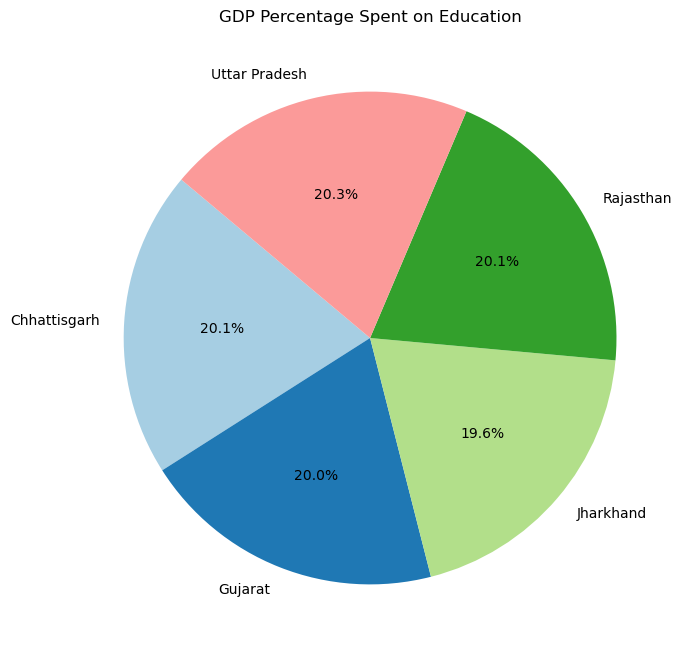

In [57]:


file_path = "State_GDP_Education.csv"  
df = pd.read_csv(file_path)

df["Year"] = df["Year"].astype(int)


df_grouped = df.groupby(["State"])["GDP_Education_Percentage"].mean().reset_index()

# Get dynamic max GDP value
max_gdp = df_grouped["GDP_Education_Percentage"].max()

# Panel Widgets
state_selector = pn.widgets.CheckBoxGroup(name="Select States", options=list(df["State"].unique()), value=list(df["State"].unique())[:5])
gdp_range = pn.widgets.RangeSlider(name="Select GDP Percentage Range", start=0, end=max_gdp, value=(0, max_gdp), step=0.1)


def plot_pie_chart(selected_states, gdp_range_values):
    df_filtered = df_grouped[
        (df_grouped["State"].isin(selected_states)) & 
        (df_grouped["GDP_Education_Percentage"].between(*gdp_range_values))
    ]
    
    if df_filtered.empty:
        return plt.figure(figsize=(8, 8))

    # Plot Pie Chart
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df_filtered["GDP_Education_Percentage"], labels=df_filtered["State"], autopct="%1.1f%%", colors=plt.cm.Paired.colors, startangle=140)
    
    plt.title("GDP Percentage Spent on Education")

    return fig  

dashboard = pn.Column(
    pn.WidgetBox("### Select States", state_selector),
    pn.WidgetBox("### GDP Range", gdp_range),
    pn.bind(plot_pie_chart, state_selector, gdp_range)  
)


dashboard.servable()
